<a href="https://colab.research.google.com/github/harihardiyan/tdgl-gl-benchmark/blob/main/notebooks/H%E2%80%91Scan_Observables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/harihardiyan/tdgl-gl-benchmark.git
%cd tdgl-gl-benchmark

!pip install -r requirements.txt --quiet

Cloning into 'tdgl-gl-benchmark'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 60 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 419.94 KiB | 11.66 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/tdgl-gl-benchmark


In [2]:

from tdgl_core import (
    init_params_basic,
    init_state_random,
    tdgl_step,
    total_energy,
    to_complex,
)

from tdgl_core.observables import (
    run_H_scan,
)

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:

# H-Scan Observables

We scan external magnetic field values H and compute:
- Total energy
- Density variance indicator
- Vortex counts (+1 and -1)
- Sample configurations at low, mid, and high H

In [3]:

H_vals = jnp.linspace(0.00, 0.50, 12)   # 12 points from 0 to 0.5
H_vals

Array([0.        , 0.04545455, 0.09090909, 0.13636364, 0.18181819,
       0.22727273, 0.27272728, 0.3181818 , 0.36363637, 0.40909094,
       0.45454547, 0.5       ], dtype=float32)

In [4]:

out = run_H_scan(
    H_vals,
    nx=64, ny=64,
    Lx=20.0, Ly=20.0,
    kappa=2.0,
    n_relax=1500,
    dt=0.01,
    n_mu_iter=80,
    noise=0.3,
)

energies = out["energies"]
indicators = out["indicators"]
vort_pos = out["vort_pos"]
vort_neg = out["vort_neg"]
samples = out["samples"]

print("Scan complete.")

Scan complete.


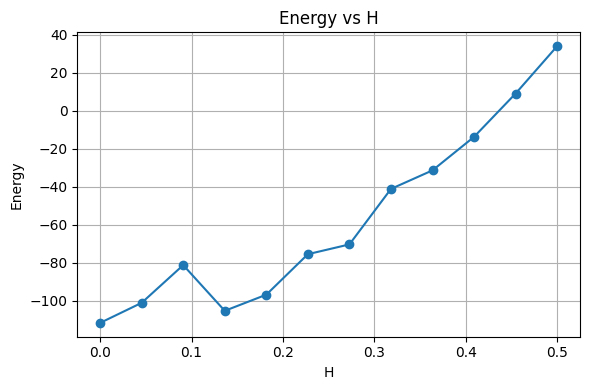

In [5]:

plt.figure(figsize=(6,4))
plt.plot(H_vals, energies, "o-")
plt.xlabel("H")
plt.ylabel("Energy")
plt.title("Energy vs H")
plt.grid(True)
plt.tight_layout()
plt.show()

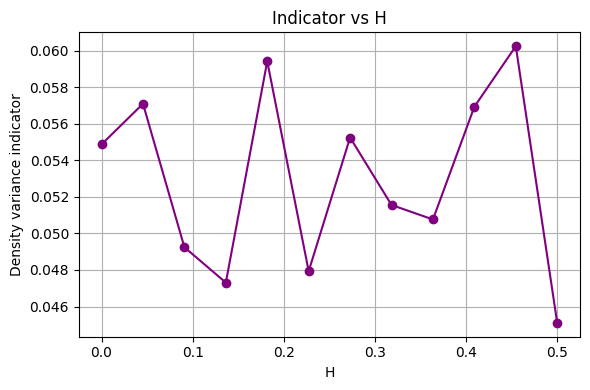

In [6]:

plt.figure(figsize=(6,4))
plt.plot(H_vals, indicators, "o-", color="purple")
plt.xlabel("H")
plt.ylabel("Density variance indicator")
plt.title("Indicator vs H")
plt.grid(True)
plt.tight_layout()
plt.show()

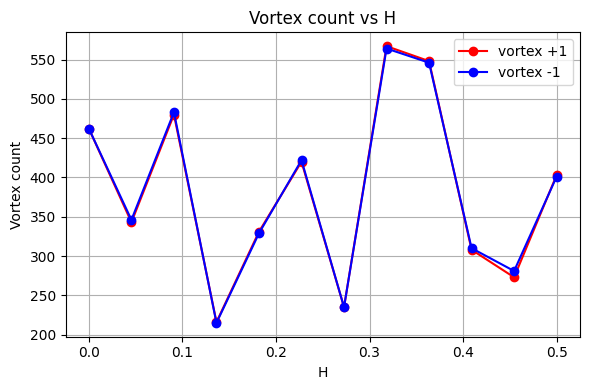

In [7]:

plt.figure(figsize=(6,4))
plt.plot(H_vals, vort_pos, "o-", label="vortex +1", color="red")
plt.plot(H_vals, vort_neg, "o-", label="vortex -1", color="blue")
plt.xlabel("H")
plt.ylabel("Vortex count")
plt.title("Vortex count vs H")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

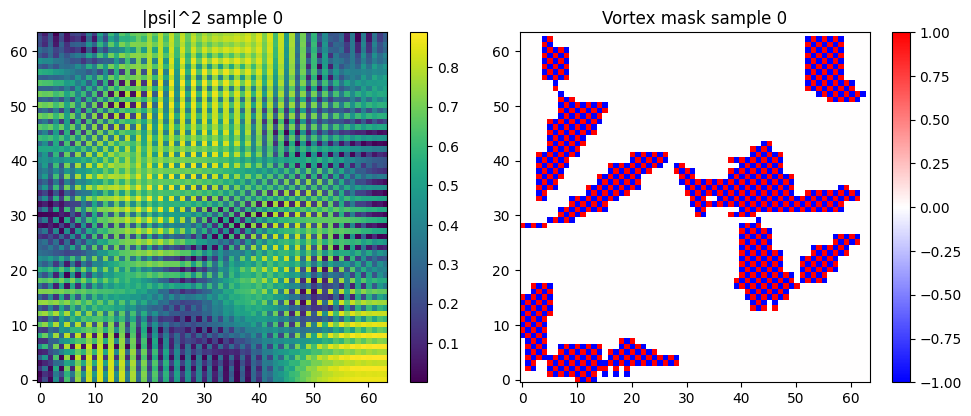

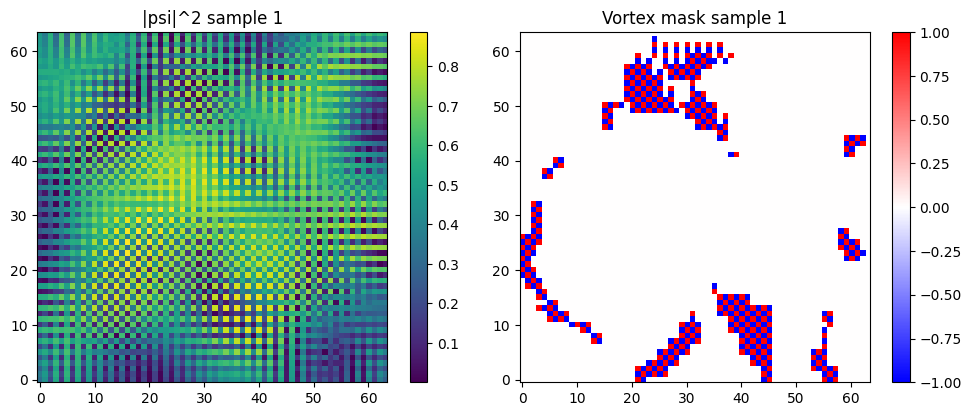

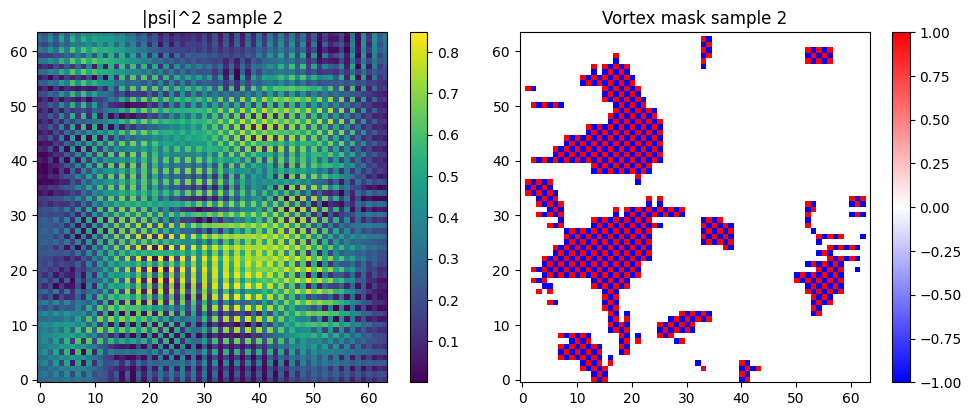

In [8]:

for i, sample in enumerate(samples):
    dens = sample["dens"]
    vort_mask = sample["vort_mask"]

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(dens, origin="lower", cmap="viridis")
    plt.title(f"|psi|^2 sample {i}")
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.imshow(vort_mask, origin="lower", cmap="bwr")
    plt.title(f"Vortex mask sample {i}")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

In [9]:

print("=== H-Scan Summary ===")
print("H values:", H_vals)
print("Energy:", energies)
print("Indicator:", indicators)
print("Vortex +1:", vort_pos)
print("Vortex -1:", vort_neg)

=== H-Scan Summary ===
H values: [0.         0.04545455 0.09090909 0.13636364 0.18181819 0.22727273
 0.27272728 0.3181818  0.36363637 0.40909094 0.45454547 0.5       ]
Energy: [-111.762474 -101.19891   -81.346664 -105.41177   -96.91764   -75.60615
  -70.4534    -41.245464  -31.478796  -13.843995    8.955425   33.88772 ]
Indicator: [0.05487303 0.05709938 0.04924511 0.04730788 0.0594224  0.0479341
 0.05525072 0.05155751 0.05076443 0.05693272 0.06025004 0.04510422]
Vortex +1: [462 343 480 216 331 420 235 567 548 308 273 403]
Vortex -1: [462 346 483 215 329 422 235 564 546 310 281 401]
